In [1]:
# Load useful modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Lorenz Attractor

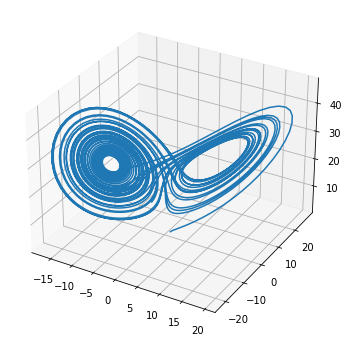

In [3]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
  x, y, z = state  # unpack the state vector
  return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure(figsize=(16.0,6.0))
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2])


# 2. A Chaotic Example

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


N=100; t = np.linspace(0,N,N)

u0 = .6; 

def solve(t,r,u0):
    u = np.zeros(N); u[0] = u0
    for i in range(1,t.shape[0]):
         u[i] = 1 - r * u[i-1]**2
    return u

0.7320508075688772 -2.732050807568877
-0.7320508075688772 2.732050807568877


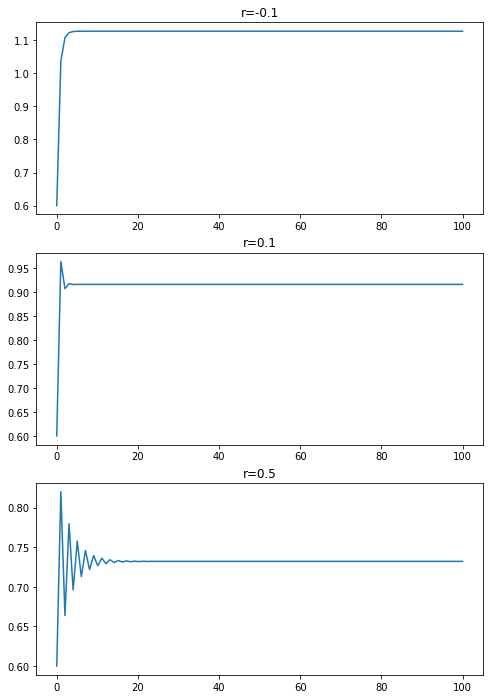

In [5]:

plt.figure(figsize=(8.0,12.0))

plt.subplot(3,1,1)
plt.plot(t,solve(t,-0.1,u0)); 
plt.title('r=-0.1')

plt.subplot(3,1,2)
plt.plot(t,solve(t,0.1,u0)); 
plt.title('r=0.1')

plt.subplot(3,1,3)
plt.plot(t,solve(t,0.5,u0)); 
plt.title('r=0.5')

r=0.5; 
u1,u2 = (-1+np.sqrt(1+4*r))/(2*r),(-1-np.sqrt(1+4*r))/(2*r)
print(u1,u2)
print(-2*r*u1,-2*r*u2)




if r is small the flow is viscous and the equation is approximately linear
for r<<1 the solution is u=1 which is the viscous limit when the forcing determines the solution when r increases the behavior


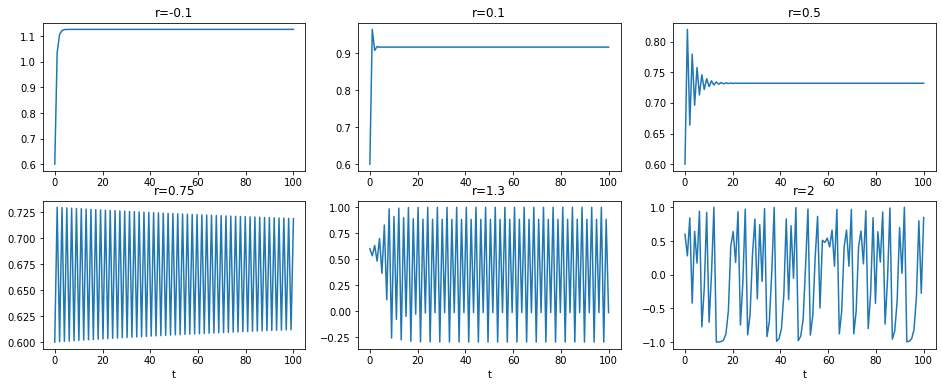

In [6]:
plt.figure(figsize=(16.0,6.0))

plt.subplot(2,3,1)
plt.plot(t,solve(t,-0.1,u0)); 
plt.title('r=-0.1')

plt.subplot(2,3,2)
plt.plot(t,solve(t,0.1,u0)); 
plt.title('r=0.1')

plt.subplot(2,3,3)
plt.plot(t,solve(t,0.5,u0)); 
plt.title('r=0.5')

plt.subplot(2,3,4)
plt.plot(t,solve(t,0.75,u0)); 
plt.xlabel('t')
plt.title('r=0.75')

plt.subplot(2,3,5)
plt.plot(t,solve(t,1.3,u0)); 
plt.xlabel('t')
plt.title('r=1.3')

plt.subplot(2,3,6)
plt.plot(t,solve(t,2.,u0)); 
plt.xlabel('t')
plt.title('r=2')

print("if r is small the flow is viscous and the equation is approximately linear")

print("for r<<1 the solution is u=1 which is the viscous limit when the forcing determines the solution when r increases the behavior")

In [7]:
r=-0.1; 
u1,u2 = (-1+np.sqrt(1+4*r))/(2*r),(-1-np.sqrt(1+4*r))/(2*r)
print(u1,u2)
print(-2*r*u1,-2*r*u2)

1.127016653792583 8.872983346207416
0.2254033307585166 1.7745966692414834


In [8]:
r=0.1; 
u1,u2 = (-1+np.sqrt(1+4*r))/(2*r),(-1-np.sqrt(1+4*r))/(2*r)
print(u1,u2)
print(-2*r*u1,-2*r*u2)

0.9160797830996159 -10.916079783099617
-0.18321595661992318 2.1832159566199234


In [9]:
r=0.5; 
u1,u2 = (-1+np.sqrt(1+4*r))/(2*r),(-1-np.sqrt(1+4*r))/(2*r)
print(u1,u2)
print(-2*r*u1,-2*r*u2)

0.7320508075688772 -2.732050807568877
-0.7320508075688772 2.732050807568877


In [10]:
r=0.75; # nonlinearly stable
u1,u2 = (-1+np.sqrt(1+4*r))/(2*r),(-1-np.sqrt(1+4*r))/(2*r)
print(u1,u2)
print(-2*r*u1,-2*r*u2)

0.6666666666666666 -2.0
-1.0 3.0


In [11]:
r=0.8; # nonlinearly stable
u1,u2 = (-1+np.sqrt(1+4*r))/(2*r),(-1-np.sqrt(1+4*r))/(2*r)
print(u1,u2)
print(-2*r*u1,-2*r*u2)

0.6558688457449499 -1.9058688457449497
-1.0493901531919199 3.04939015319192


In [12]:
r=1.3; 
u1,u2 = (-1+np.sqrt(1+4*r))/(2*r),(-1-np.sqrt(1+4*r))/(2*r)
print(u1,u2)
print(-2*r*u1,-2*r*u2)

0.573069199845287 -1.3422999690760562
-1.4899799195977463 3.4899799195977463


In [13]:
r=2.; 
u1,u2 = (-1+np.sqrt(1+4*r))/(2*r),(-1-np.sqrt(1+4*r))/(2*r)
print(u1,u2)
print(-2*r*u1,-2*r*u2)

0.5 -1.0
-2.0 4.0


'\n\nr=1.3: 2 dominant frequencies = transition to chaos\n(pick up oscillations with twice the period of the original oscillations)\n\nr=2.: broadband (almost white) spectrum in time = fully chaotic\n\n'

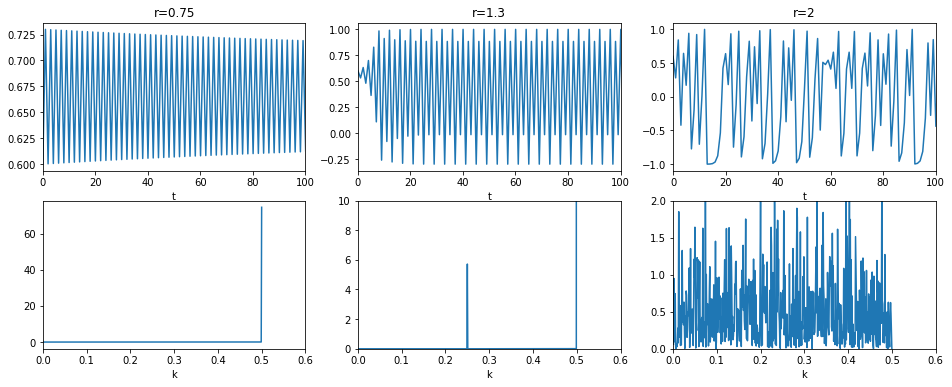

In [14]:
from scipy import fft
from scipy import fftpack

def myfft(u):
    nx = u.shape[0]
    return (np.abs(np.fft.rfft((u)))[1:]**2)/nx


N=1000; t = np.linspace(0,N,N)
k = np.fft.rfftfreq(N)[1:]

plt.figure(figsize=(16.0,6.0))

#################
plt.subplot(2,3,1)
plt.plot(t,solve(t,0.75,u0)); 
plt.xlabel('t')
plt.title('r=0.75')
plt.xlim([0, 100])

plt.subplot(2,3,4)
plt.plot(k,myfft(solve(t,0.8,u0))); 
plt.xlabel('k')
plt.xlim([0, 0.6])

#################
plt.subplot(2,3,2)
u = solve(t,1.3,u0)
plt.plot(t,u); 
plt.xlabel('t')
plt.title('r=1.3')
plt.xlim([0, 100])

plt.subplot(2,3,5)
plt.plot(k,myfft(u)); 
plt.xlabel('k')
plt.ylim([0, 10])
plt.xlim([0, 0.6])

#################
plt.subplot(2,3,3)
u = solve(t,2.,u0)
plt.plot(t,u); 
plt.xlabel('t')
plt.title('r=2')
plt.xlim([0, 100])

plt.subplot(2,3,6)
plt.plot(k,myfft(u)); 
plt.xlabel('k')
plt.ylim([0, 2])
plt.xlim([0, 0.6])
'''

r=1.3: 2 dominant frequencies = transition to chaos
(pick up oscillations with twice the period of the original oscillations)

r=2.: broadband (almost white) spectrum in time = fully chaotic

'''

'\nThe behavior is unpredictable (predicatibility time very short)\n\nthink about weather patterns for which Re = 1e9 - 1e12\n'

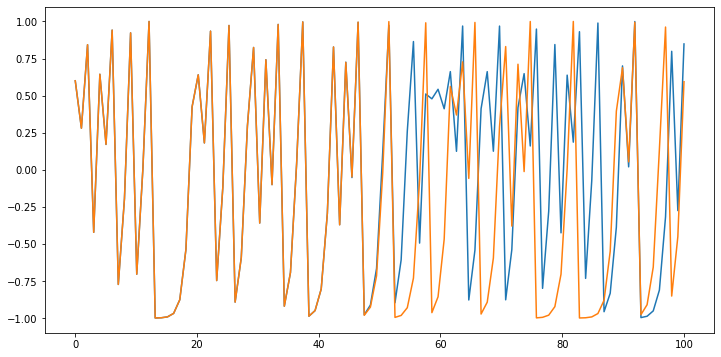

In [19]:
# Sensitivity to CI

N=100; t = np.linspace(0,N,N)


plt.figure(figsize=(12.0,6.0))
plt.plot(t,solve(t,2.,u0)); 
plt.plot(t,solve(t,2.,u0+1e-16)); 

'''
The behavior is unpredictable (predicatibility time very short)

think about weather patterns for which Re = 1e9 - 1e12
'''

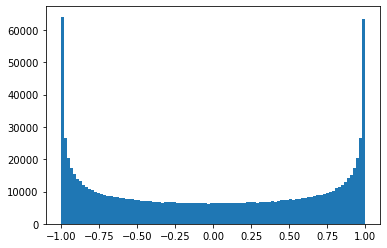

In [15]:
#Statistics

N=1000000; t = np.linspace(0,N,N)
u0=0.6
u = solve(t,2.,u0)
_ = plt.hist(u,100)

'\ntime series are different but pdf are the same \n\nu explores the entire range of values between -1 and 1 = ergodic\n\n(a time mean at one point is the same than a large number of realization (an ensemble) at a given time)\n'

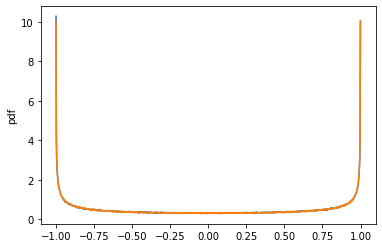

In [16]:
def normhistogram(u,bins):
    pdf, _ = np.histogram(u,bins)
    pdf = pdf / ((bins[2]-bins[1])*len(u))
    return pdf

# plot the pdf for different CI
bins = np.linspace(-1.,1.,1000)
pdf = normhistogram(u,bins)
plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-');
plt.ylabel('pdf'); 

pdf = normhistogram(solve(t,2.,u0+1e-4),bins)
plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-');
plt.ylabel('pdf'); 

'''
time series are different but pdf are the same 

u explores the entire range of values between -1 and 1 = ergodic

(a time mean at one point is the same than a large number of realization (an ensemble) at a given time)
'''

In [22]:
u0==u0+1e-17


True